**INSTALLAZIONE PACCHETTI**

In [ ]:
!pip install sodapy
!pip install contextily
!pip install esda
!pip install splot
!pip install pysal
!pip install rioxarray

**CARICAMENTO PACCHETTI**

In [ ]:
## per leggere file e scrivere
import pandas as pd
## per importare dataframe dal portale
from sodapy import Socrata

## per creare dati spaziali
import geopandas as gpd

## per mappe di base
import contextily as ctx

## per statistiche spaziali
import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster, plot_moran_simulation
from splot.libpysal import plot_spatial_weights
import libpysal as lps

## grafiche
import matplotlib.pyplot as plt
from matplotlib import style
import plotly.express as px

from pysal.lib import weights
from pysal.lib import cg as Geometry

import seaborn as sns
import numpy as np

## libreria per le regressioni OLS
from pysal.model import spreg
from scipy.stats import norm

## altre librerie
import folium
import mapclassify
import rioxarray as rp
from shapely.geometry import Polygon
from pylab import figure, scatter, show
import random as rdm
import os
from pysal.explore import esda
from matplotlib import colors
import rioxarray
import xarray
from splot import esda as esdaplot
from sklearn.metrics import mean_squared_error as mse
import pysal
from spreg import ols,ml_error,ml_lag
from scipy import stats
from patsy import dmatrices
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import ProbPlot
import pysal as ps
from libpysal.weights import DistanceBand, KNN
from shapely.geometry import Point
from mapclassify import Quantiles
import matplotlib.cm as cm
from scipy.stats import shapiro

**PREPARAZIONE DEI DATI**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

os.chdir("/content/drive/My Drive/ANALISI_SPAZIALE")
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/My Drive/ANALISI_SPAZIALE'

In [ ]:
shp=gpd.read_file("progetto.shp")
shp.head(3)

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,SHAPE_AREA,SHAPE_LEN,geometry
0,1,1,2,0,2,Vercelli,-,Vercelli,VC,Provincia,2.082097e+09,418078.067821,"POLYGON ((438328.612 5087208.215, 439028.888 5..."
1,1,1,3,0,3,Novara,-,Novara,NO,Provincia,1.341318e+09,250242.112077,"POLYGON ((460929.542 5076320.298, 461165.259 5..."
2,1,1,1,201,201,-,Torino,Torino,TO,Citta metropolitana,6.828137e+09,539249.811270,"POLYGON ((411015.006 5049970.983, 411266.039 5..."


In [ ]:
shp=shp[["COD_PROV","DEN_UTS","geometry"]]
shp.columns=["Codice","Provincia","geometry"]
shp.sort_values(by="Provincia").head(10)

,Codice,Provincia,geometry
87,84,Agrigento,"MULTIPOLYGON (((854917.167 4184689.012, 855634..."
3,6,Alessandria,"POLYGON ((453307.918 5005504.323, 454248.380 5..."
37,42,Ancona,"POLYGON ((839227.174 4849956.872, 839931.918 4..."
4,7,Aosta,"POLYGON ((390652.644 5091766.171, 390748.643 5..."
51,51,Arezzo,"MULTIPOLYGON (((717735.270 4861831.815, 718023..."
39,44,Ascoli Piceno,"POLYGON ((889731.453 4779834.882, 890615.695 4..."
7,5,Asti,"POLYGON ((425041.329 4997628.309, 424948.989 4..."
61,64,Avellino,"POLYGON ((1019219.059 4588538.816, 1019331.371..."
73,72,Bari,"MULTIPOLYGON (((1136700.636 4589454.112, 11368..."
84,110,Barletta-Andria-Trani,"POLYGON ((1081237.144 4611047.023, 1081399.393..."


<Axes: >

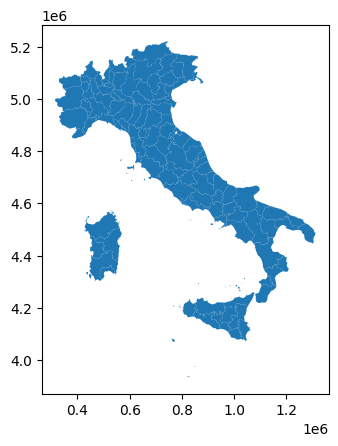

In [ ]:
shp.plot()

In [ ]:
Tasso_occupazione_giovanile = pd.read_excel("data.xlsx")
dataset = pd.merge(shp, Tasso_occupazione_giovanile)
dataset.sort_values(by="Provincia").head(3)

,Codice,Provincia,geometry,Tasso di occupazione giovanile (15-29 anni),Competenza alfabetica non adeguata (studenti classi III scuola secondaria primo grado),Competenza numerica non adeguata (studenti classi III scuola secondaria primo grado),Laureati e altri titoli terziari (25-39 anni),Mobilità dei laureati italiani (25-39 anni),Organizzazioni non profit,Partecipazione alla formazione continua,Partecipazione elettorale,Persone con almeno il diploma (25-64 anni),Raccolta differenziata dei rifiuti urbani
87,84,Agrigento,"MULTIPOLYGON (((854917.167 4184689.012, 855634...",14.7,49.6,61.0,22.0,-50.9,32.8,5.0,36.3,54.2,49.1
3,6,Alessandria,"POLYGON ((453307.918 5005504.323, 454248.380 5...",38.8,32.1,37.3,25.4,-13.2,70.0,7.7,63.1,61.0,57.4
37,42,Ancona,"POLYGON ((839227.174 4849956.872, 839931.918 4...",29.8,26.6,26.4,30.4,-9.1,76.4,9.1,60.4,67.4,69.2


In [ ]:
dataset.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 107 entries, 0 to 106
Data columns (total 13 columns):
 #   Column                                                                                  Non-Null Count  Dtype   
---  ------                                                                                  --------------  -----   
 0   Codice                                                                                  107 non-null    int64   
 1   Provincia                                                                               107 non-null    object  
 2   geometry                                                                                107 non-null    geometry
 3   Tasso di occupazione giovanile (15-29 anni)                                             107 non-null    float64 
 4   Competenza alfabetica non adeguata (studenti classi III scuola secondaria primo grado)  107 non-null    float64 
 5   Competenza numerica non adeguata (studenti classi III sc

In [ ]:
type(dataset)

geopandas.geodataframe.GeoDataFrame

In [ ]:
dataset.shape

(107, 13)

**ANALISI DESCRITTIVA**

In [ ]:
dataset["Tasso di occupazione giovanile (15-29 anni)"].describe()

count    107.000000
mean      32.571963
std        9.043947
min       14.700000
25%       25.100000
50%       33.500000
75%       39.450000
max       52.700000
Name: Tasso di occupazione giovanile (15-29 anni), dtype: float64

In [ ]:
## Asimmetria e Curtosi ##

print("Asimmetria:")
print(round(dataset["Tasso di occupazione giovanile (15-29 anni)"].skew(),4))
print("Curtosi:")
print(round(dataset["Tasso di occupazione giovanile (15-29 anni)"].kurtosis(),4))

Asimmetria:
-0.1044
Curtosi:
-0.9486


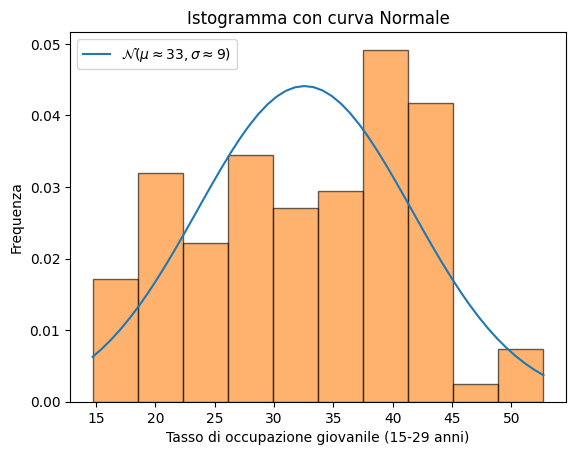

In [ ]:
## Istogramma ##

std=np.std(dataset["Tasso di occupazione giovanile (15-29 anni)"],ddof=1)
mean=np.mean(dataset["Tasso di occupazione giovanile (15-29 anni)"])

domain=np.linspace(np.min(dataset["Tasso di occupazione giovanile (15-29 anni)"]),np.max(dataset["Tasso di occupazione giovanile (15-29 anni)"]))
plt.plot(domain,norm.pdf(domain,mean,std),label="$\mathcal{N}$" + f'$( \mu \\approx {round(mean)} , \sigma \\approx {round(std)} )$')
plt.hist(dataset["Tasso di occupazione giovanile (15-29 anni)"],edgecolor="black",alpha=0.6,density=True)
plt.title("Istogramma con curva Normale")
plt.xlabel("Tasso di occupazione giovanile (15-29 anni)")
plt.ylabel("Frequenza")
plt.legend()
plt.show()

In [ ]:
## Boxplot ##

fig = px.box(dataset, x="Tasso di occupazione giovanile (15-29 anni)", title="Boxplot")
fig.show()

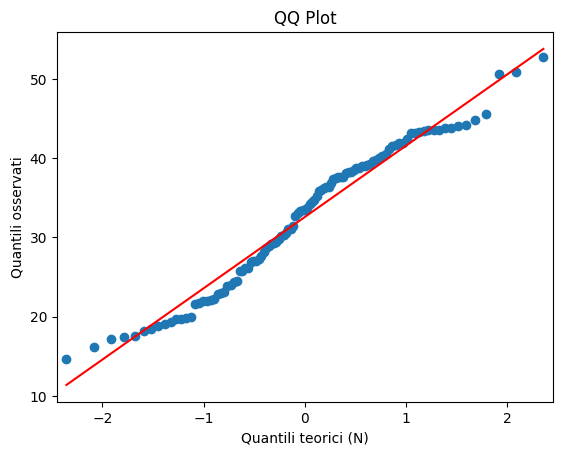

In [ ]:
## QQ plot ##

sm.qqplot(dataset['Tasso di occupazione giovanile (15-29 anni)'], line='s')
plt.xlabel('Quantili teorici (N)')
plt.ylabel('Quantili osservati')
plt.title('QQ Plot')
plt.show()

In [ ]:
## Test Jarque-Bera ##

from scipy.stats import jarque_bera
jarque_bera(dataset['Tasso di occupazione giovanile (15-29 anni)'])

SignificanceResult(statistic=4.300882090862815, pvalue=0.11643279429552589)

In [ ]:
### ANALISI OLS DELLE "COMPETENZE"  ###

# Seleziono le variabili indipendenti
var_espl = [
    "Competenza alfabetica non adeguata (studenti classi III scuola secondaria primo grado)",
    "Competenza numerica non adeguata (studenti classi III scuola secondaria primo grado)",
    "Laureati e altri titoli terziari (25-39 anni)",
    "Mobilità dei laureati italiani (25-39 anni)",
    "Organizzazioni non profit",
    "Partecipazione alla formazione continua",
    "Partecipazione elettorale",
    "Persone con almeno il diploma (25-64 anni)",
    "Raccolta differenziata dei rifiuti urbani"
]

X = dataset[var_espl]
X = sm.add_constant(X)

y = dataset["Tasso di occupazione giovanile (15-29 anni)"]

# Rimuovo colonne con valori mancanti o infiniti
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna(axis=1)

y = y.loc[X.index]

mod_reg = sm.OLS(y, X)
reg = mod_reg.fit()

# Stampo i risultati della regressione
print(reg.summary())

                                         OLS Regression Results                                        
Dep. Variable:     Tasso di occupazione giovanile (15-29 anni)   R-squared:                       0.818
Model:                                                     OLS   Adj. R-squared:                  0.801
Method:                                          Least Squares   F-statistic:                     48.29
Date:                                         Wed, 20 Dec 2023   Prob (F-statistic):           5.92e-32
Time:                                                 11:06:37   Log-Likelihood:                -295.94
No. Observations:                                          107   AIC:                             611.9
Df Residuals:                                               97   BIC:                             638.6
Df Model:                                                    9                                         
Covariance Type:                                     nonrobust  

In [ ]:
## MULTICOLLINEARITA' DELLE "COMPETENZE"

# variance inflaction factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Seleziona solo le colonne delle variabili indipendenti nel DataFrame
X = dataset[var_espl]

# Aggiungi una colonna di costanti (intercetta) al DataFrame
X_with_intercept = sm.add_constant(X)

# Calcola il VIF per ciascuna variabile indipendente
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_intercept.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_intercept.values, i) for i in range(X_with_intercept.shape[1])]

# Visualizza i risultati
print(vif_data.iloc[1:].sort_values(by='VIF'))

                                            Variable        VIF
9          Raccolta differenziata dei rifiuti urbani   1.671112
5                          Organizzazioni non profit   1.792776
6            Partecipazione alla formazione continua   2.882936
3      Laureati e altri titoli terziari (25-39 anni)   3.024565
7                          Partecipazione elettorale   3.315544
8         Persone con almeno il diploma (25-64 anni)   3.840686
4        Mobilità dei laureati italiani (25-39 anni)   4.073616
1  Competenza alfabetica non adeguata (studenti c...  11.670451
2  Competenza numerica non adeguata (studenti cla...  18.351049


In [ ]:
# Modello semplice per la competenza alfabetica

model_competenza_alfabetica = sm.OLS.from_formula(
    "Q('Tasso di occupazione giovanile (15-29 anni)') ~ Q('Competenza alfabetica non adeguata (studenti classi III scuola secondaria primo grado)')",
    data=dataset
).fit()

# Modello semplice per la competenza numerica
model_competenza_numerica = sm.OLS.from_formula(
    "Q('Tasso di occupazione giovanile (15-29 anni)') ~ Q('Competenza numerica non adeguata (studenti classi III scuola secondaria primo grado)')",
    data=dataset
).fit()

# Stampa i risultati
print("Risultati modello competenza alfabetica:")
print(model_competenza_alfabetica.summary())

print("\nRisultati modello competenza numerica:")
print(model_competenza_numerica.summary())


Risultati modello competenza alfabetica:
                                           OLS Regression Results                                           
Dep. Variable:     Q('Tasso di occupazione giovanile (15-29 anni)')   R-squared:                       0.468
Model:                                                          OLS   Adj. R-squared:                  0.463
Method:                                               Least Squares   F-statistic:                     92.38
Date:                                              Wed, 20 Dec 2023   Prob (F-statistic):           4.56e-16
Time:                                                      11:06:39   Log-Likelihood:                -353.18
No. Observations:                                               107   AIC:                             710.4
Df Residuals:                                                   105   BIC:                             715.7
Df Model:                                                         1                    

In [ ]:
competenze= ["Competenza alfabetica non adeguata (studenti classi III scuola secondaria primo grado)",
             "Competenza numerica non adeguata (studenti classi III scuola secondaria primo grado)"]

cormat = dataset[competenze + ["Tasso di occupazione giovanile (15-29 anni)"]].corr()
cormat_df = pd.DataFrame(cormat.iloc[:-1, -1])
cormat_df.style.background_gradient(cmap='coolwarm')

,Tasso di occupazione giovanile (15-29 anni)
Competenza alfabetica non adeguata (studenti classi III scuola secondaria primo grado),-0.684135
Competenza numerica non adeguata (studenti classi III scuola secondaria primo grado),-0.817677


**ANALISI REGRESSIONE**

In [ ]:
### MODELLO OLS ###

# Seleziono le variabili indipendenti
var_espl = [
    "Competenza numerica non adeguata (studenti classi III scuola secondaria primo grado)",
    "Laureati e altri titoli terziari (25-39 anni)",
    "Mobilità dei laureati italiani (25-39 anni)",
    "Organizzazioni non profit",
    "Partecipazione alla formazione continua",
    "Partecipazione elettorale",
    "Persone con almeno il diploma (25-64 anni)",
    "Raccolta differenziata dei rifiuti urbani"
]

X = dataset[var_espl]
X = sm.add_constant(X)

y = dataset["Tasso di occupazione giovanile (15-29 anni)"]

# Rimuovo colonne con valori mancanti o infiniti
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna(axis=1)

y = y.loc[X.index]

mod_reg = sm.OLS(y, X)
reg = mod_reg.fit()

# Stampo i risultati della regressione
print(reg.summary())

                                         OLS Regression Results                                        
Dep. Variable:     Tasso di occupazione giovanile (15-29 anni)   R-squared:                       0.772
Model:                                                     OLS   Adj. R-squared:                  0.753
Method:                                          Least Squares   F-statistic:                     41.46
Date:                                         Wed, 20 Dec 2023   Prob (F-statistic):           3.65e-28
Time:                                                 11:06:42   Log-Likelihood:                -307.88
No. Observations:                                          107   AIC:                             633.8
Df Residuals:                                               98   BIC:                             657.8
Df Model:                                                    8                                         
Covariance Type:                                     nonrobust  

In [ ]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.05,
                       threshold_out=0.05,
                       verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]

        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f'Aggiunta variabile: {best_feature} con p-value {best_pval:.4f}')

        # Rimuovi variabili con p-value al di sopra della soglia di uscita
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Rimozione variabile: {worst_feature} con p-value {worst_pval:.4f}')

        if not changed:
            break

    return included

# Eseguo la selezione stepwise
# Assicurati di avere X e y definiti precedentemente
selected_features = stepwise_selection(X, y)

# Adatto il modello di regressione finale
step_model = sm.OLS(y, sm.add_constant(X[selected_features])).fit()
print(step_model.summary())


Aggiunta variabile: const con p-value 0.0000
Aggiunta variabile: Competenza numerica non adeguata (studenti classi III scuola secondaria primo grado) con p-value 0.0000
Aggiunta variabile: Partecipazione elettorale con p-value 0.0005
Aggiunta variabile: Raccolta differenziata dei rifiuti urbani con p-value 0.0027
Aggiunta variabile: Organizzazioni non profit con p-value 0.0422
Aggiunta variabile: Mobilità dei laureati italiani (25-39 anni) con p-value 0.0353
Aggiunta variabile: Persone con almeno il diploma (25-64 anni) con p-value 0.0061
                                         OLS Regression Results                                        
Dep. Variable:     Tasso di occupazione giovanile (15-29 anni)   R-squared:                       0.770
Model:                                                     OLS   Adj. R-squared:                  0.756
Method:                                          Least Squares   F-statistic:                     55.84
Date:                                  

In [ ]:
### MODELLO OLS ###

# Seleziono le variabili indipendenti
var_step = [
    "Competenza numerica non adeguata (studenti classi III scuola secondaria primo grado)",
    "Mobilità dei laureati italiani (25-39 anni)",
    "Organizzazioni non profit",
    "Partecipazione elettorale",
    "Persone con almeno il diploma (25-64 anni)",
    "Raccolta differenziata dei rifiuti urbani"
]

X = dataset[var_step]
X = sm.add_constant(X)

y = dataset["Tasso di occupazione giovanile (15-29 anni)"]

# Rimuovo colonne con valori mancanti o infiniti
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna(axis=1)

y = y.loc[X.index]

mod_reg = sm.OLS(y, X)
reg = mod_reg.fit()

# Stampo i risultati della regressione
print(reg.summary())

                                         OLS Regression Results                                        
Dep. Variable:     Tasso di occupazione giovanile (15-29 anni)   R-squared:                       0.770
Model:                                                     OLS   Adj. R-squared:                  0.756
Method:                                          Least Squares   F-statistic:                     55.84
Date:                                         Wed, 20 Dec 2023   Prob (F-statistic):           9.42e-30
Time:                                                 11:06:45   Log-Likelihood:                -308.29
No. Observations:                                          107   AIC:                             630.6
Df Residuals:                                              100   BIC:                             649.3
Df Model:                                                    6                                         
Covariance Type:                                     nonrobust  

**DIAGNOSTICA DEL MODELLO**

In [ ]:
## MEDIA DEL TERMINE DI ERRORE PARI A 0

reg.resid.mean()

4.9073932871655516e-14

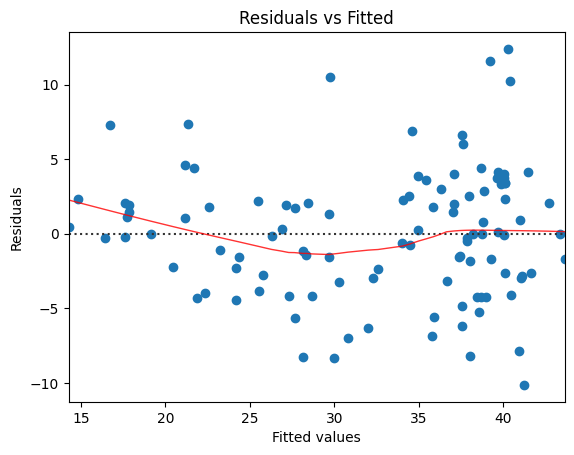

In [ ]:
## RELAZIONE LINEARE SIGNIFICATIVA TRA OGNI PREDITTORE E LA DIPENDENTE

# grafico residuals vs fitted

model_fitted_y = reg.fittedvalues
model_residuals = reg.resid
model_norm_residuals = reg.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
model_abs_resid = np.abs(model_residuals)
model_leverage = reg.get_influence().cooks_distance[0]
model_cooks = reg.get_influence().cooks_distance[0]

# Creazione del grafico Residuals vs Fitted
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(x=model_fitted_y, y=model_residuals,
                                  lowess=True,
                                  scatter_kws={'alpha': 1},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

plt.show()


In [ ]:
cormat = dataset[var_step + ["Tasso di occupazione giovanile (15-29 anni)"]].corr()
cormat_df = pd.DataFrame(cormat.iloc[:-1, -1])
cormat_df['p-value'] = [stats.pearsonr(dataset["Tasso di occupazione giovanile (15-29 anni)"], dataset[var])[1] for var in var_step]
cormat_df.style.background_gradient(cmap='coolwarm')

,Tasso di occupazione giovanile (15-29 anni),p-value
Competenza numerica non adeguata (studenti classi III scuola secondaria primo grado),-0.817677,0.000000
Mobilità dei laureati italiani (25-39 anni),0.721818,0.000000
Organizzazioni non profit,0.518476,0.000000
Partecipazione elettorale,0.769634,0.000000
Persone con almeno il diploma (25-64 anni),0.520089,0.000000
Raccolta differenziata dei rifiuti urbani,0.607617,0.000000


In [ ]:
## ASSENZA DI CORRELAZIONE DEI TERMINI DI ERRORE

## test di Durbin-Watson

from statsmodels.stats.stattools import durbin_watson
durbin_watson(model_residuals)

1.8880325363629316

In [ ]:
## OMOSCHEDASTICITA' DEI RESIDUI

# test Breusch-Pagan

bp_test = sm.stats.het_breuschpagan(model_residuals,X)
print("Breusch-Pagan test statistic:", bp_test[0])
print("Breusch-Pagan p-value:", bp_test[1])

Breusch-Pagan test statistic: 6.278357058572566
Breusch-Pagan p-value: 0.39274162830269693


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



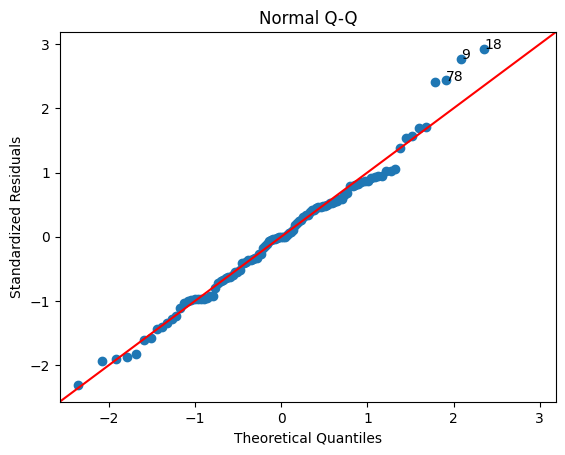

In [ ]:
## NORMALITA' DEI RESIDUI

## normal QQ-PLOT

QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=1, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

In [ ]:
# test Jarque-Bera

from scipy.stats import jarque_bera
jb_statistic, jb_p_value = jarque_bera(model_residuals)

# Stampa i risultati del test
print("Jarque-Bera test statistic:", jb_statistic)
print("Jarque-Bera p-value:", jb_p_value)

Jarque-Bera test statistic: 1.8708326138472566
Jarque-Bera p-value: 0.39242246333267233


In [ ]:
## MULTICOLLINEARITA'

# variance inflaction factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Seleziona solo le colonne delle variabili indipendenti nel DataFrame
X = dataset[var_step]

# Aggiungi una colonna di costanti (intercetta) al DataFrame
X_with_intercept = sm.add_constant(X)

# Calcola il VIF per ciascuna variabile indipendente
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_intercept.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_intercept.values, i) for i in range(X_with_intercept.shape[1])]

# Visualizza i risultati
print(vif_data.iloc[1:].sort_values(by='VIF'))


                                            Variable       VIF
3                          Organizzazioni non profit  1.623289
6          Raccolta differenziata dei rifiuti urbani  1.662781
5         Persone con almeno il diploma (25-64 anni)  2.528243
4                          Partecipazione elettorale  3.105079
2        Mobilità dei laureati italiani (25-39 anni)  3.133743
1  Competenza numerica non adeguata (studenti cla...  5.168842


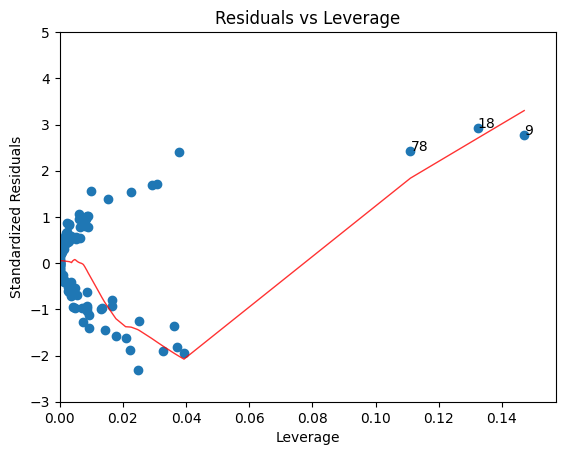

In [ ]:
## VALORI INFLUENTI

## verifica punti leva
plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=1);
sns.regplot(x=model_leverage, y=model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

  # annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));

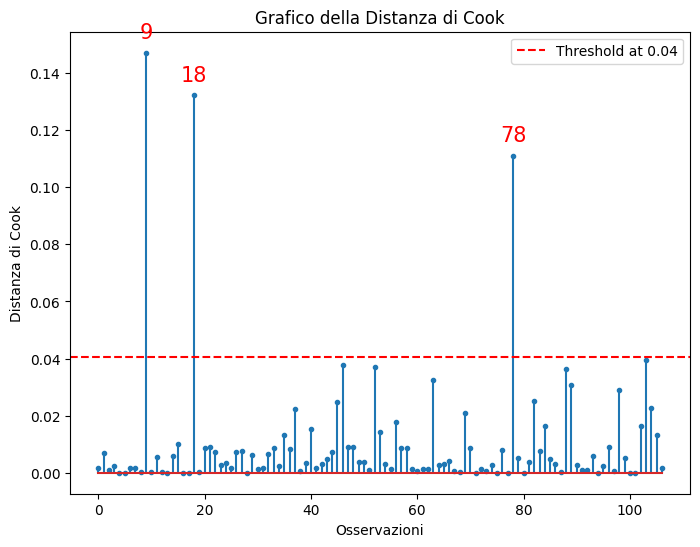

In [ ]:
# distanza di Cook

influence = reg.get_influence()
n, p = len(X), reg.df_model + 1  # df_model restituisce il numero di variabili predittive
threshold_cook = 4 / (n - p - 1)

cook_d2, _ = influence.cooks_distance

# Identifica gli indici dei punti ad alta leva
high_leverage_points = np.where(cook_d2 > threshold_cook)[0]

# Crea il grafico della distanza di Cook
plt.figure(figsize=(8, 6))
plt.stem(cook_d2, markerfmt='.')

# Aggiungi etichette ai punti ad alta leva
for i in high_leverage_points:
    plt.annotate(f'{i}', (i, cook_d2[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=15, color='r')

plt.axhline(y=threshold_cook, color='r', linestyle='--', label=f'Threshold at {threshold_cook:.2f}')
plt.xlabel('Osservazioni')
plt.ylabel('Distanza di Cook')
plt.title('Grafico della Distanza di Cook')

plt.legend()
plt.show()

In [ ]:
cook = pd.DataFrame(dataset.loc[[9, 18, 78], ['Provincia', 'Tasso di occupazione giovanile (15-29 anni)']])
MEDIA = dataset['Tasso di occupazione giovanile (15-29 anni)'].mean()
cook.loc[''] = ["MEDIA", MEDIA]
print(cook)

   Provincia  Tasso di occupazione giovanile (15-29 anni)
9    Sondrio                                    50.800000
18   Bolzano                                    52.700000
78     Prato                                    50.600000
       MEDIA                                    32.571963


**ANALISI SPAZIALE**

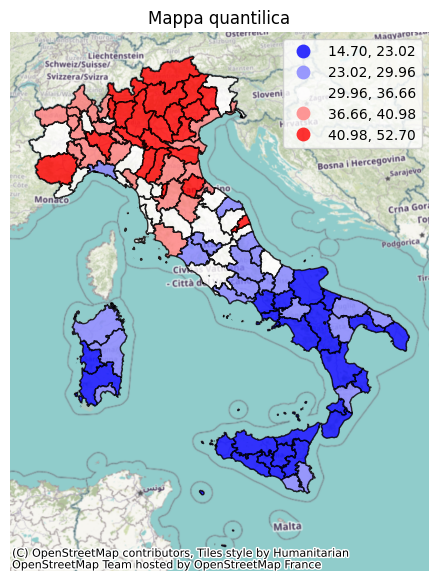

In [ ]:
## Mappa quantilica (1) ##

fig,ax=plt.subplots(figsize=(7,7))

dataset.plot(ax=ax,column="Tasso di occupazione giovanile (15-29 anni)",legend=True,alpha=0.8,cmap="bwr",scheme="quantiles",marker=".", edgecolor='black')

ax.axis("off")
ax.set_title("Mappa quantilica")
ctx.add_basemap(ax,crs=dataset.crs)

<ipython-input-105-a2e10d3439f0>:4: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



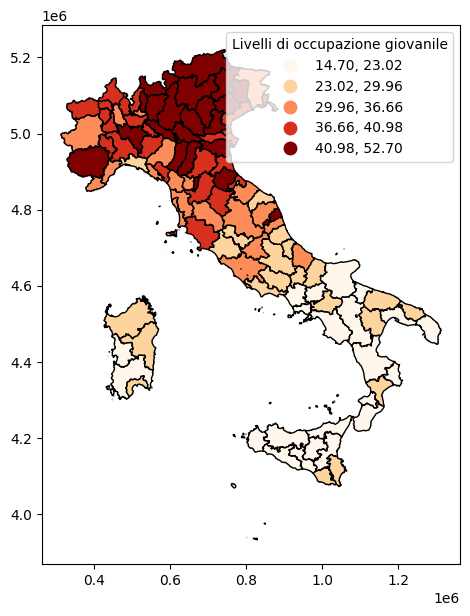

In [ ]:
## Mappa quantilica (2) ##

quantiles = Quantiles(dataset["Tasso di occupazione giovanile (15-29 anni)"], k=5)
palette = cm.get_cmap('OrRd', len(quantiles.bins))

fig, ax = plt.subplots(1, 1, figsize=(7,7))

dataset.plot(column="Tasso di occupazione giovanile (15-29 anni)", ax=ax, legend=True, cmap=palette, scheme='quantiles', edgecolor='black')

legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))
legend.set_title("Livelli di occupazione giovanile")
plt.show()

In [ ]:
wq=weights.contiguity.Queen.from_dataframe(dataset,ids="Provincia")

/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning:

The weights matrix is not fully connected: 
 There are 3 disconnected components.



In [ ]:
pd.DataFrame(*wq.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
Vercelli,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Novara,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Torino,1,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Alessandria,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Aosta,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cagliari,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lecce,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pordenone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Messina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
wq.cardinalities

{'Vercelli': 7,
 'Novara': 5,
 'Torino': 6,
 'Alessandria': 7,
 'Aosta': 3,
 'Imperia': 2,
 'Cuneo': 4,
 'Asti': 4,
 'Como': 4,
 'Sondrio': 6,
 'Savona': 5,
 'Genova': 5,
 'La Spezia': 3,
 'Varese': 5,
 'Brescia': 6,
 'Pavia': 6,
 'Milano': 7,
 'Bergamo': 6,
 'Bolzano': 3,
 'Cremona': 7,
 'Mantova': 8,
 'Belluno': 6,
 'Treviso': 5,
 'Venezia': 5,
 'Trento': 6,
 'Verona': 6,
 'Vicenza': 5,
 'Udine': 4,
 'Gorizia': 2,
 'Trieste': 1,
 'Padova': 5,
 'Rovigo': 5,
 'Modena': 6,
 'Bologna': 6,
 'Piacenza': 6,
 'Parma': 7,
 "Reggio nell'Emilia": 5,
 'Ancona': 3,
 'Macerata': 4,
 'Ascoli Piceno': 5,
 'Ferrara': 5,
 'Ravenna': 4,
 "Forli'-Cesena": 4,
 'Pesaro e Urbino': 4,
 'Livorno': 2,
 'Pisa': 5,
 'Massa Carrara': 4,
 'Lucca': 6,
 'Pistoia': 5,
 'Firenze': 9,
 'Grosseto': 4,
 'Arezzo': 6,
 'Siena': 7,
 'Viterbo': 5,
 'Rieti': 7,
 'Perugia': 8,
 'Terni': 4,
 'Frosinone': 5,
 'Caserta': 6,
 'Roma': 5,
 'Latina': 3,
 'Avellino': 5,
 'Salerno': 3,
 'Benevento': 5,
 'Napoli': 4,
 'Chieti': 4,
 'Ca

In [ ]:
wq.histogram  ## distribuzione dei vicini

[(1, 2), (2, 11), (3, 19), (4, 22), (5, 27), (6, 14), (7, 9), (8, 2), (9, 1)]

<Axes: ylabel='Frequency'>

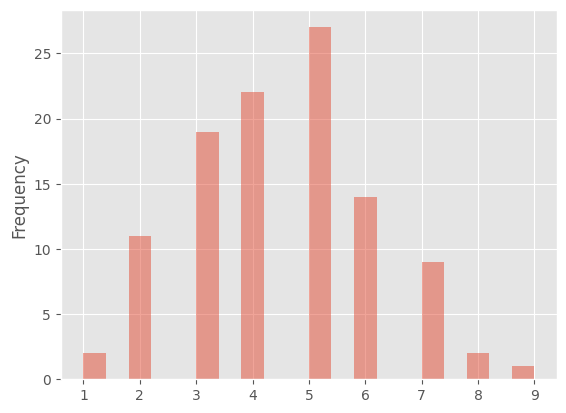

In [ ]:
style.use("ggplot")
pd.Series(wq.cardinalities).plot.hist(bins=20,alpha=0.5)

In [ ]:
pd.DataFrame(np.array([wq.nonzero,wq.pct_nonzero,wq.n,wq.n**2,wq.mean_neighbors,wq.min_neighbors,wq.max_neighbors]).reshape(7,1),
             index=["n.vicini","% vicini","tot.province","(tot.province)^2","n.medio vicini","n.min vicini","n.max vicini"],
            columns=["metodo_Queen"])

,metodo_Queen
n.vicini,476.000000
% vicini,4.157568
tot.province,107.000000
(tot.province)^2,11449.000000
n.medio vicini,4.448598
n.min vicini,1.000000
n.max vicini,9.000000


In [ ]:
wq.transform="R"
wq_matrix, ids=wq.full()
df_wq=pd.DataFrame(wq)
df_wq

,0,1
0,Vercelli,"{'Pavia': 0.14285714285714285, 'Biella': 0.142..."
1,Novara,"{'Pavia': 0.2, 'Vercelli': 0.2, 'Verbano-Cusio..."
2,Torino,"{'Biella': 0.16666666666666666, 'Vercelli': 0...."
3,Alessandria,"{'Pavia': 0.14285714285714285, 'Vercelli': 0.1..."
4,Aosta,"{'Biella': 0.3333333333333333, 'Vercelli': 0.3..."
...,...,...
102,Cagliari,{'Sud Sardegna': 1.0}
103,Lecce,"{'Brindisi': 0.5, 'Taranto': 0.5}"
104,Pordenone,"{'Udine': 0.25, 'Venezia': 0.25, 'Treviso': 0...."
105,Messina,"{'Enna': 0.3333333333333333, 'Catania': 0.3333..."


In [ ]:
pd.DataFrame([(wq.neighbors)])

,Vercelli,Novara,Torino,Alessandria,Aosta,Imperia,Cuneo,Asti,Como,Sondrio,...,Trapani,Siracusa,Sassari,Palermo,Nuoro,Cagliari,Lecce,Pordenone,Messina,Isernia
0,"[Pavia, Biella, Alessandria, Verbano-Cusio-Oss...","[Pavia, Vercelli, Verbano-Cusio-Ossola, Milano...","[Biella, Vercelli, Cuneo, Alessandria, Aosta, ...","[Pavia, Vercelli, Genova, Savona, Piacenza, As...","[Biella, Vercelli, Torino]","[Savona, Cuneo]","[Savona, Asti, Imperia, Torino]","[Cuneo, Savona, Alessandria, Torino]","[Monza e della Brianza, Varese, Lecco, Sondrio]","[Bergamo, Como, Brescia, Trento, Lecco, Bolzano]",...,"[Agrigento, Palermo]","[Ragusa, Catania]","[Nuoro, Oristano]","[Agrigento, Caltanissetta, Enna, Trapani, Mess...","[Oristano, Sud Sardegna, Sassari]",[Sud Sardegna],"[Brindisi, Taranto]","[Udine, Venezia, Treviso, Belluno]","[Enna, Catania, Palermo]","[Chieti, Campobasso, Caserta, L'Aquila, Frosin..."


<ipython-input-114-c7c40133b321>:3: FutureWarning:

`use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning

/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning:

The weights matrix is not fully connected: 
 There are 3 disconnected components.



Text(0.5, 1.0, 'QUEEN')

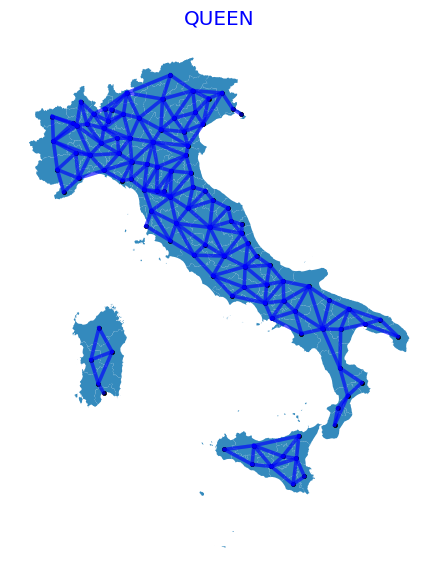

In [ ]:
## QUEEN ##

w_queen=weights.contiguity.Queen.from_dataframe(dataset)
f, axs = plt.subplots(1, 1, figsize=(7,7))
dataset.plot(ax=axs)
plot1=w_queen.plot(
    dataset,
    edge_kws=dict(linewidth=2.5, color="blue",alpha=0.4),
    node_kws=dict(marker="."),
    ax=axs,
)
axs.set_axis_off()
axs.set_title("QUEEN",color="blue")



<ipython-input-115-70d4d438dffb>:3: FutureWarning:

`use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning

/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning:

The weights matrix is not fully connected: 
 There are 3 disconnected components.



Text(0.5, 1.0, 'ROOK')

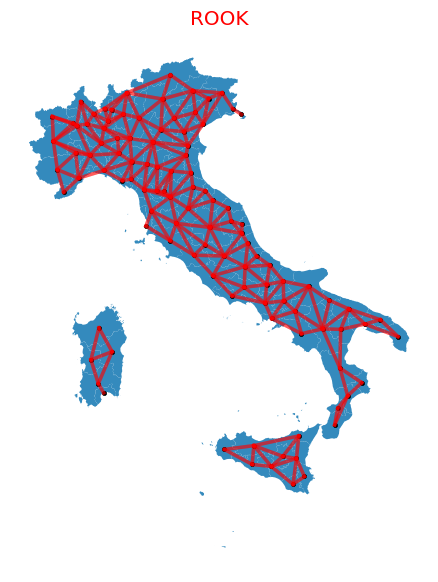

In [ ]:
## ROOK ##

w_rook=weights.Rook.from_dataframe(dataset)
w_rook.n
f, axs = plt.subplots(1, 1, figsize=(7,7))
dataset.plot(ax=axs)
plot2=w_rook.plot(
    dataset,
    edge_kws=dict(linewidth=2.5, color="red",alpha=0.4),
    node_kws=dict(marker="."),
    ax=axs,
)
axs.set_axis_off()
axs.set_title("ROOK",color="red")

/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:224: UserWarning:

The weights matrix is not fully connected: 
 There are 4 disconnected components.



Text(0.5, 1.0, 'DISTANCE')

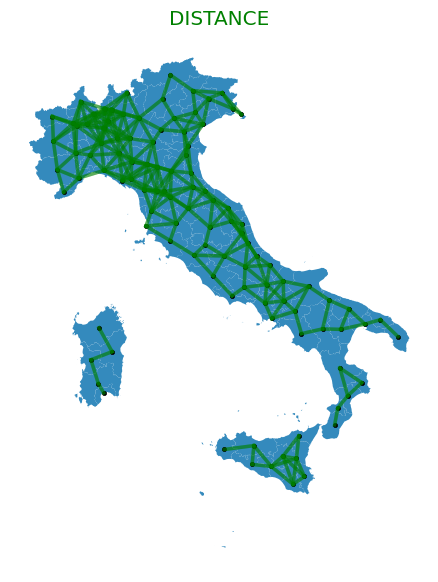

In [ ]:
## DISTANCE ##

dataset["Coordinate_centroide"]=dataset.centroid
coords = [(point.x, point.y) for point in dataset["Coordinate_centroide"]]
w_distance = DistanceBand(coords, threshold=80000)

f, axs = plt.subplots(1, 1, figsize=(7,7))
dataset.plot(ax=axs)
plot3=w_distance.plot(
    dataset,
    edge_kws=dict(linewidth=2.5, color="green",alpha=0.4),
    node_kws=dict(marker="."),
    ax=axs,
)
axs.set_axis_off()
axs.set_title("DISTANCE",color="green")

In [ ]:
pd.DataFrame(np.array([w_distance.nonzero,w_distance.pct_nonzero,w_distance.n,w_distance.n**2,w_distance.mean_neighbors,w_distance.min_neighbors,w_distance.max_neighbors]).reshape(7,1),
             index=["n.vicini","% vicini","tot.province","(tot.province)^2","n.medio vicini","n.min vicini","n.max vicini"],
            columns=["metodo_Distance"])

,metodo_Distance
n.vicini,540.000000
% vicini,4.716569
tot.province,107.000000
(tot.province)^2,11449.000000
n.medio vicini,5.046729
n.min vicini,1.000000
n.max vicini,12.000000


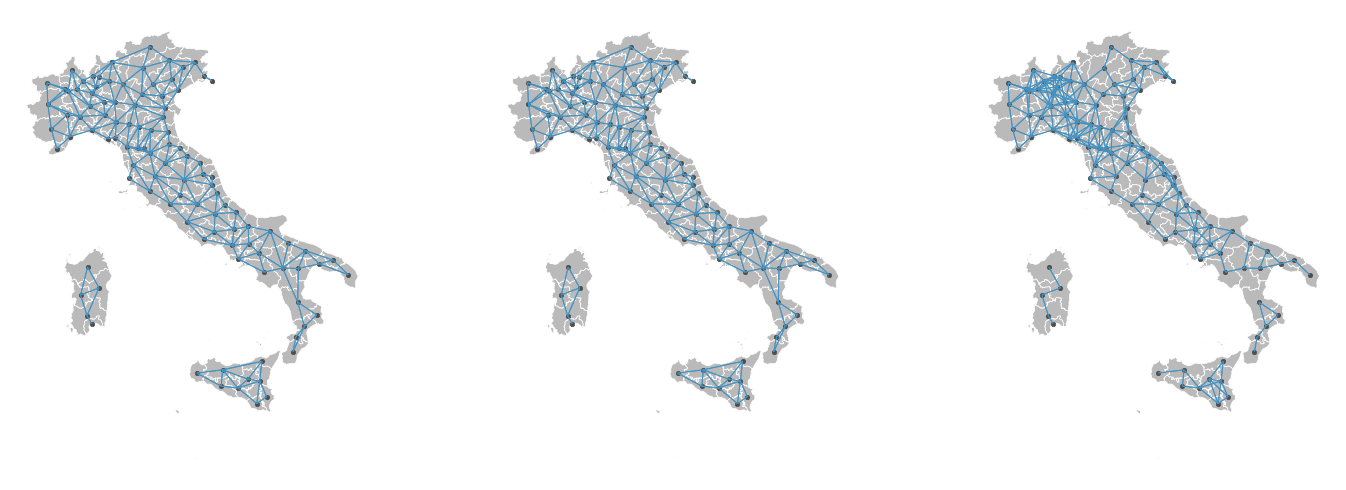

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plot_spatial_weights(w_queen, dataset, ax=axs[0])
plot_spatial_weights(w_rook, dataset, ax=axs[1])
plot_spatial_weights(w_distance, dataset, ax=axs[2])

plt.tight_layout()
plt.show()

**INDICI DI AUTOCORRELAZIONE SPAZIALE**

In [ ]:
## INDICE DI MORAN(I)

moran=esda.moran.Moran(dataset["Tasso di occupazione giovanile (15-29 anni)"],w_queen)
print(moran.I)
print(moran.p_norm)

0.8145987014397634
2.2195632334896065e-34


In [ ]:
## INDICE DI GEARY (C)

geary = esda.geary.Geary(dataset["Tasso di occupazione giovanile (15-29 anni)"], w_queen)
print(geary.C)
print(geary.p_sim)

0.1696537441377846
0.001


In [ ]:
result_df = pd.DataFrame(columns=['Moran(I)', 'p-value(I)', 'Geary(C)', 'p-value(C)'])

# Aggiungi una riga al DataFrame
result_df.loc[0] = [moran.I, moran.p_norm, geary.C, geary.p_sim]

# Stampa il DataFrame
print(result_df)


   Moran(I)    p-value(I)  Geary(C)  p-value(C)
0  0.814599  2.219563e-34  0.169654       0.001


/usr/local/lib/python3.10/dist-packages/splot/_viz_esda_mpl.py:354: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/usr/local/lib/python3.10/dist-packages/splot/_viz_esda_mpl.py:354: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




(<Figure size 1000x400 with 2 Axes>, array([<Axes: title={'center': 'Reference Distribution'}, xlabel='Moran I: 0.81', ylabel='Density'>,
       <Axes: title={'center': 'Moran Scatterplot (0.81)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
      dtype=object))
(<Figure size 1000x400 with 2 Axes>, array([<Axes: title={'center': 'Reference Distribution'}, xlabel='Moran I: 0.81', ylabel='Density'>,
       <Axes: title={'center': 'Moran Scatterplot (0.81)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
      dtype=object))


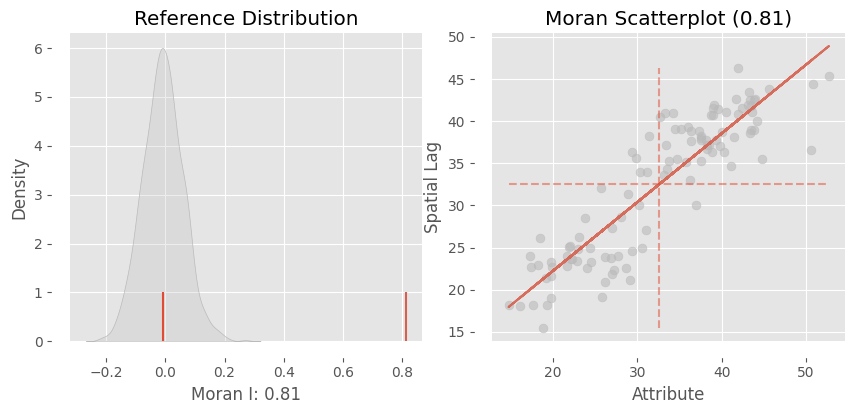

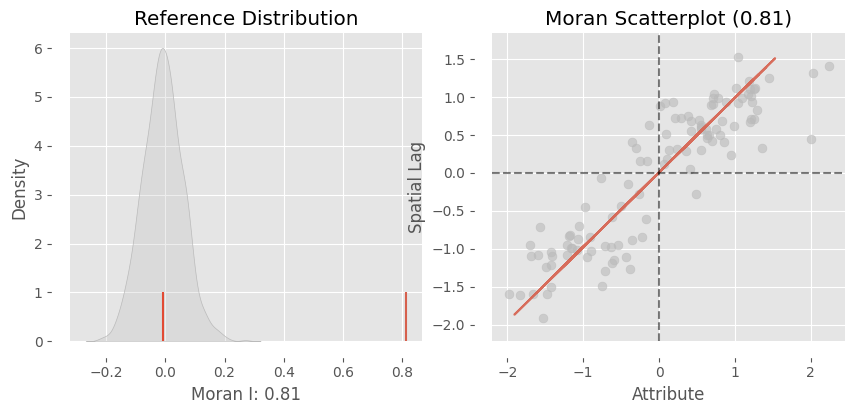

In [ ]:
print(plot_moran(moran,fill=True,zstandard=False))
print(plot_moran(moran,fill=True,zstandard=True))

In [ ]:
## LISA

lisa = esda.moran.Moran_Local(dataset["Tasso di occupazione giovanile (15-29 anni)"], w_queen)

data_lisa=dataset
data_lisa["quadrant"]=lisa.q
data_lisa["p-value"]=lisa.p_sim
data_lisa["significant"]=lisa.p_sim<0.05

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:409: UserWarning:

The GeoSeries you are attempting to plot is empty. Nothing has been displayed.



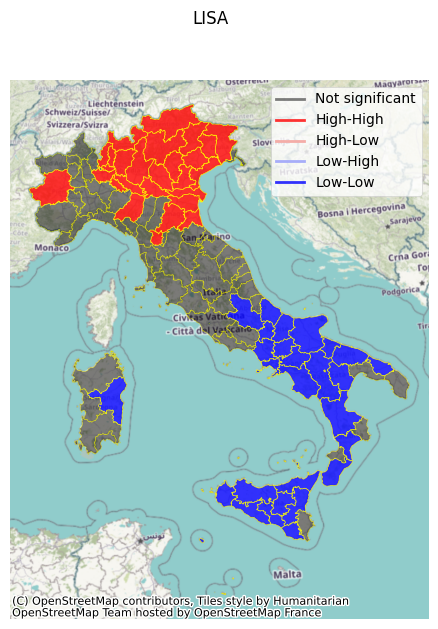

In [ ]:
f, ax=plt.subplots(1,figsize=(7,7))
## plot insignificant clusters
ns=dataset.loc[dataset["significant"]==False,"geometry"]
ns.plot(ax=ax,color="k",alpha=0.5,edgecolor="yellow")

## plot HH clusters
HH=dataset.loc[(dataset["quadrant"]==1) & (dataset["significant"]==True),"geometry"]
HH.plot(ax=ax,color="red",alpha=0.8,edgecolor="yellow")

## plot LL clusters
LL=dataset.loc[(dataset["quadrant"]==3) & (dataset["significant"]==True),"geometry"]
LL.plot(ax=ax,color="blue",alpha=0.8,edgecolor="yellow")


## plot LH clusters
LH=dataset.loc[(dataset["quadrant"]==2) & (dataset["significant"]==True),"geometry"]
LH.plot(ax=ax,color="#a7adf9")

## plot HL clusters
HL=dataset.loc[(dataset["quadrant"]==4) & (dataset["significant"]==True),"geometry"]
HL.plot(ax=ax,color="#f4ada8")
ctx.add_basemap(ax,crs=dataset.crs)

# Add legend
from matplotlib.lines import Line2D
legend_handles = [
    Line2D([0], [0], color="k", alpha=0.5, lw=2),
    Line2D([0], [0], color="red", alpha=0.8, lw=2),
    Line2D([0], [0], color="#f4ada8", lw=2),
    Line2D([0], [0], color="#a7adf9", lw=2),
    Line2D([0], [0], color="blue", alpha=0.8, lw=2)

]
legend_labels = ["Not significant", "High-High", "High-Low", "Low-High", "Low-Low"]
ax.legend(legend_handles, legend_labels, frameon=True, facecolor='white')

# Style and draw
f.suptitle("LISA")
ax.set_axis_off()
plt.show()

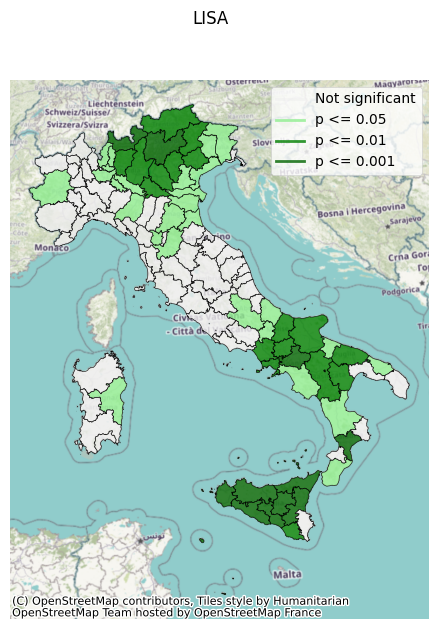

In [ ]:
f, ax = plt.subplots(1, figsize=(7, 7))

# Plot per p-value

pval0001 = dataset.loc[data_lisa['p-value'] <= 0.001, "geometry"]
pval001 = dataset.loc[(data_lisa['p-value'] > 0.001) & (data_lisa['p-value'] <= 0.01), "geometry"]
pval005 = dataset.loc[(data_lisa['p-value'] > 0.01) & (data_lisa['p-value'] <= 0.05), "geometry"]
pvalns = dataset.loc[data_lisa['p-value'] > 0.05, "geometry"]

pval0001.plot(ax=ax, color="darkgreen", alpha=0.8, edgecolor="black", label="p <= 0.001")
pval001.plot(ax=ax, color="green", alpha=0.8, edgecolor="black", label="0.001 < p <= 0.01")
pval005.plot(ax=ax, color="lightgreen", alpha=0.8, edgecolor="black", label="0.01 < p <= 0.05")
pvalns.plot(ax=ax, color="#eeeeee", alpha=0.8, edgecolor="black", label="Not significant")

# Aggiungi mappa di base
ctx.add_basemap(ax, crs=dataset.crs)

# Aggiungi legenda
legend_handles = [
    Line2D([0], [0], color="#eeeeee", alpha=0.5, lw=2),
    Line2D([0], [0], color="lightgreen", alpha=0.8, lw=2),
    Line2D([0], [0], color="green", alpha=0.8, lw=2),
    Line2D([0], [0], color="darkgreen", alpha=0.8, lw=2)
]
legend_labels = ["Not significant","p <= 0.05","p <= 0.01","p <= 0.001"]
ax.legend(legend_handles, legend_labels, frameon=True, facecolor='white')

# Stile e visualizzazione
f.suptitle("LISA")
ax.set_axis_off()
plt.show()

In [ ]:
(lisa.p_sim<=0.05).sum()*100/len(lisa.p_sim)

51.401869158878505